## Libraries

In [ ]:
from time import time
import matplotlib.pyplot as plt
from tqdm import tqdm
from numpy import argmin, argmax
from datetime import datetime, timedelta
from pandas import read_csv, concat, get_dummies

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from tensorflow.keras.models import Sequential
from tensorflow.keras import layers


In [ ]:
## Timeline building
start_date = datetime(2000, 1, 1)

timeline_100hz = [start_date + timedelta(seconds=t/100) for t in range(100*60)]
timeline_10hz = [start_date + timedelta(seconds=t/10) for t in range(10*60)]
timeline_1hz = [start_date + timedelta(seconds=t/1) for t in range(1*60)]

print('(Length) 100Hz: {} - 10Hz: {} - 1Hz: {}'.format(len(timeline_100hz),
                                                       len(timeline_10hz),
                                                       len(timeline_1hz)))

(Length) 100Hz: 6000 - 10Hz: 600 - 1Hz: 60


## Dataset

In [ ]:

## Download zip file
!wget https://mayorcl-my.sharepoint.com/:u:/g/personal/anthony_cho_umayor_cl/EUyic5OFZF9Cvx2-iqvSGXIBHZkx0f4e0hooFZ0i9-D82A?download=1

## Rename downloaded file
!mv EUyic5OFZF9Cvx2-iqvSGXIBHZkx0f4e0hooFZ0i9-D82A?download=1 CM_hydraulicSystems.zip

## Unzip file
!unzip CM_hydraulicSystems.zip

--2023-10-13 00:01:56--  https://mayorcl-my.sharepoint.com/:u:/g/personal/anthony_cho_umayor_cl/EUyic5OFZF9Cvx2-iqvSGXIBHZkx0f4e0hooFZ0i9-D82A?download=1
Resolving mayorcl-my.sharepoint.com (mayorcl-my.sharepoint.com)... 13.107.136.10, 13.107.138.10, 2620:1ec:8f8::10, ...
Connecting to mayorcl-my.sharepoint.com (mayorcl-my.sharepoint.com)|13.107.136.10|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /personal/anthony_cho_umayor_cl/Documents/Proyectos/SSM%20-%20Prediccion%20y%20pron%c3%b3stico%20de%20fallas/Datasets/CM_hydraulicSystems.zip?ga=1 [following]
--2023-10-13 00:01:57--  https://mayorcl-my.sharepoint.com/personal/anthony_cho_umayor_cl/Documents/Proyectos/SSM%20-%20Prediccion%20y%20pron%c3%b3stico%20de%20fallas/Datasets/CM_hydraulicSystems.zip?ga=1
Reusing existing connection to mayorcl-my.sharepoint.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 76601704 (73M) [application/x-zip-compressed]
Saving to: ‘EUyic5OFZF9Cvx2-iqvSGXIBHZk

## EDA: Raw data

In [ ]:
files = ['PS1.txt', 'PS2.txt', 'PS3.txt', 'PS4.txt', 'PS5.txt', 'PS6.txt',  ## Pressure data (100 Hz * 60 secs)
         'EPS1.txt', ## Motor power data (100 Hz * 60 secs)
         'FS1.txt', 'FS2.txt', ## Volume flow data (10 Hz * 60 secs)
         'TS1.txt', 'TS2.txt', 'TS3.txt', 'TS4.txt', ## Temperature data (1 Hz * 60 secs)
         'VS1.txt', ## Vibration data (1 Hz * 60 secs)
         'CE.txt', ## Cooling efficiency (virtual)  (1 Hz * 60 secs)
         'CP.txt' ## Cooling power (virtual)  (1 Hz * 60 secs),
         'SE.txt' ## Efficiency factor  (1 Hz * 60 secs)
         ]

files_100hz = ['PS1.txt', 'PS2.txt', 'PS3.txt', 'PS4.txt', 'PS5.txt', 'PS6.txt',  ## Pressure data (100 Hz * 60 secs)
               'EPS1.txt', ## Motor power data (100 Hz * 60 secs)
              ]

files_10hz = ['FS1.txt', 'FS2.txt', ## Volume flow data (10 Hz * 60 secs)
             ]

files_1hz = ['TS1.txt', 'TS2.txt', 'TS3.txt', 'TS4.txt', ## Temperature data (1 Hz * 60 secs)
             'VS1.txt', ## Vibration data (1 Hz * 60 secs)
             'CE.txt', ## Cooling efficiency (virtual)  (1 Hz * 60 secs)
             'CP.txt', ## Cooling power (virtual)  (1 Hz * 60 secs),
             'SE.txt' ## Efficiency factor  (1 Hz * 60 secs)
            ]

In [ ]:
## Data storage as dictionary
data_raw = {}

for file in tqdm(files_100hz):

    ## key name
    key = file.split('.')[0]

    ## load data set
    data = read_csv(file, sep='\t', header=None)
    data.columns = timeline_100hz

    ## Store loaded data
    data_raw[key] = data

for file in tqdm(files_10hz):

    ## key name
    key = file.split('.')[0]

    ## load data set
    data = read_csv(file, sep='\t', header=None)
    data.columns = timeline_10hz

    ## Store loaded data
    data_raw[key] = data

for file in tqdm(files_1hz):

    ## key name
    key = file.split('.')[0]

    ## load data set
    data = read_csv(file, sep='\t', header=None)
    data.columns = timeline_1hz

    ## Store loaded data
    data_raw[key] = data

100%|██████████| 8/8 [00:00<00:00, 28.33it/s]


In [ ]:
## Print data dimension
for key in data_raw.keys():
    print('(shape) {:4s}: {}'.format(key, data_raw[key].shape))

(shape) PS1 : (2205, 6000)
(shape) PS2 : (2205, 6000)
(shape) PS3 : (2205, 6000)
(shape) PS4 : (2205, 6000)
(shape) PS5 : (2205, 6000)
(shape) PS6 : (2205, 6000)
(shape) EPS1: (2205, 6000)
(shape) FS1 : (2205, 600)
(shape) FS2 : (2205, 600)
(shape) TS1 : (2205, 60)
(shape) TS2 : (2205, 60)
(shape) TS3 : (2205, 60)
(shape) TS4 : (2205, 60)
(shape) VS1 : (2205, 60)
(shape) CE  : (2205, 60)
(shape) CP  : (2205, 60)
(shape) SE  : (2205, 60)


In [ ]:
## Load targets dataset
targets = read_csv('profile.txt', sep='\t', header=None)
targets.columns = ['Cooler_condition', 'Valve_condition', 'Internal_pump_leakage', 'Hydraulic_accumulator', 'stable_flag']

targets.head()

,Cooler_condition,Valve_condition,Internal_pump_leakage,Hydraulic_accumulator,stable_flag
0,3,100,0,130,1
1,3,100,0,130,1
2,3,100,0,130,1
3,3,100,0,130,1
4,3,100,0,130,1


1. Cooler condition / %:
	- 3: close to total failure
	- 20: reduced effifiency
	- 100: full efficiency

2. Valve condition / %:
	- 100: optimal switching behavior
	- 90: small lag
	- 80: severe lag
	- 73: close to total failure

3. Internal pump leakage:
	- 0: no leakage
	- 1: weak leakage
	- 2: severe leakage

4. Hydraulic accumulator / bar:
	- 130: optimal pressure
	- 115: slightly reduced pressure
	- 100: severely reduced pressure
	- 90: close to total failure

5. stable flag:
	- 0: conditions were stable
	- 1: static conditions might not have been reached yet

In [ ]:
## dataset size
n_data = len(data_raw.keys())

## Display images
plt.figure(figsize=(16, 4*n_data))
for i, key in tqdm(enumerate(data_raw.keys())):

    plt.subplot(n_data, 1, i+1)
    data = data_raw[key]
    for row in range(len(data)):
        plt.plot(data.iloc[row, :])

    if f'{key}.txt' in files_100hz:
        freq = 100
    elif f'{key}.txt' in files_10hz:
        freq = 10
    else:
        freq = 1

    plt.title(f'{key} ({freq}Hz)')

plt.tight_layout()
plt.savefig('data_raw.pdf')
plt.show()

## EDA: Pre-processed data

In [ ]:
## 1Hz data allocation
data_1hz = {}

for key in data_raw.keys():
    ## Apply resampling by mean operation to transform all data to 1hz frequency.
    data_1hz[key] = data_raw[key].T.resample('1s').mean().T

In [ ]:
## Print data dimension
for key in data_1hz.keys():
    print('(shape) {:4s}: {}'.format(key, data_1hz[key].shape))

(shape) PS1 : (2205, 60)
(shape) PS2 : (2205, 60)
(shape) PS3 : (2205, 60)
(shape) PS4 : (2205, 60)
(shape) PS5 : (2205, 60)
(shape) PS6 : (2205, 60)
(shape) EPS1: (2205, 60)
(shape) FS1 : (2205, 60)
(shape) FS2 : (2205, 60)
(shape) TS1 : (2205, 60)
(shape) TS2 : (2205, 60)
(shape) TS3 : (2205, 60)
(shape) TS4 : (2205, 60)
(shape) VS1 : (2205, 60)
(shape) CE  : (2205, 60)
(shape) CP  : (2205, 60)
(shape) SE  : (2205, 60)


In [ ]:
## dataset size
n_data = len(data_raw.keys())

## Display images
plt.figure(figsize=(16, 4*n_data))
for i, key in tqdm(enumerate(data_raw.keys())):

    plt.subplot(n_data, 2, 2*i+1)
    data = data_raw[key]
    for row in range(len(data)):
        plt.plot(data.iloc[row, :])

    if f'{key}.txt' in files_100hz:
        freq = 100
    elif f'{key}.txt' in files_10hz:
        freq = 10
    else:
        freq = 1

    plt.title(f'{key} ({freq}Hz)')

    plt.subplot(n_data, 2, 2*i+2)
    data = data_1hz[key]
    for row in range(len(data)):
        plt.plot(data.iloc[row, :])

    plt.title(f'{key} (1Hz)')

plt.tight_layout()
plt.savefig('data_1hz.pdf')
plt.show()

## Merging data

In [ ]:
table_1hz = concat([data_1hz[key] for key in data_1hz.keys()], axis=1)
table_1hz = table_1hz.T.reset_index(drop=True).T
print('(shape) {}'.format(table_1hz.shape))
table_1hz.head(2)

(shape) (2205, 1020)


,0,1,2,3,4,5,6,7,8,9,...,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019
0,176.8996,184.6420,189.8996,191.3442,191.2833,191.312,191.2947,191.3183,191.3116,174.3218,...,74.427,68.101,68.101,68.420,68.420,68.223,68.223,68.159,68.159,68.264
1,174.2707,191.3529,191.3024,191.3244,191.2904,191.240,191.2647,191.2463,191.2714,174.2776,...,74.492,68.536,68.536,68.465,68.465,68.491,68.491,68.528,68.528,68.595


In [ ]:
targets.columns

Index(['Cooler_condition', 'Valve_condition', 'Internal_pump_leakage',
       'Hydraulic_accumulator', 'stable_flag'],
      dtype='object')

In [ ]:
## Target
target_var = targets.columns[1]
print(targets[target_var].value_counts(), end=2*'\n')

## Target One-hot encoding
y_enc = get_dummies(targets[target_var])
display(y_enc.head())

100    1125
73      360
80      360
90      360
Name: Valve_condition, dtype: int64



,73,80,90,100
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


In [ ]:
## Partition set
X_train, X_test, y_train, y_test = train_test_split(table_1hz, y_enc,
                                                    test_size=0.3,
                                                    stratify=targets[target_var],
                                                    random_state=20231013)

print('(shape - Train) X: {} - y: {}'.format(X_train.shape, y_train.shape))
print('(shape - Test) X: {} - y: {}'.format(X_test.shape, y_test.shape))
print('(Balance - Train) {}'.format(y_train.sum().values))
print('(Balance - Test) {}'.format(y_test.sum().values))

(shape - Train) X: (1543, 1020) - y: (1543, 4)
(shape - Test) X: (662, 1020) - y: (662, 4)
(Balance - Train) [252 252 252 787]
(Balance - Test) [108 108 108 338]


In [ ]:
## Scaler instance and fitting
scaler = StandardScaler().fit(X_train)

## Apply scaling to data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Model builder

In [ ]:
def plot_history(history, width=12, height=6):
  """
  DESCRIPTION:
    Historical performance of the keras model

  INPUT:
    @param history: history of performance of fitted model
    @type history: tensorflow.python.keras.callbacks.History

    @param width: width of the graphic display
    @type width: int

    @param height: height of the graphic display
    @type height: int

  OUTPUT:
    A graphic
  """

  ## Metrics keys stored in tensorflow object
  keys = list(history.history.keys())

  ## Number of epoch used for fit the model
  epoch = range(1, len(history.epoch) +1)

  ## Check if validation set was used.
  withValidation = False
  for key in keys:
    if 'val' in key:
      withValidation = True

  ## Number of metrics
  nMetrics = len(keys)
  if withValidation:
    nMetrics = nMetrics//2

  ## Plot-space instance
  plt.figure(figsize=(width, height))

  for i in range(nMetrics):
    plt.subplot(nMetrics, 1, i+1)

    ## Plot (train) metric value
    labelMetric = keys[i]
    metric = history.history[keys[i]]
    plt.plot(epoch, metric, 'o-', label=labelMetric)

    if withValidation:
      ## Plot (validation) metric value
      labelMetricVal = keys[i+nMetrics]
      metricVal = history.history[keys[i+nMetrics]]
      plt.plot(epoch, metricVal, 'o-', label=labelMetricVal)

    plt.xlim(epoch[0], epoch[-1])
    plt.legend()
    plt.grid()

  plt.xlabel('Epoch')
  plt.show()

In [ ]:
## Model instance
model = Sequential(name='Classifer')
model.add(layers.Input(shape=(X_train.shape[1],), name='Input'))
"""
model.add(layers.Dense(units=8,
                       activation='relu',
                       name='Dense_01'))
"""
model.add(layers.Dense(units=y_train.shape[1],
                       activation='softmax',
                       name='output'))

## Compiler settings
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "Classifer"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 output (Dense)              (None, 4)                 4084      
                                                                 
Total params: 4084 (15.95 KB)
Trainable params: 4084 (15.95 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
start = time()

## Model fitting
history = model.fit(x=X_train, y=y_train,
                    validation_split=0.1,
                    batch_size=32,
                    epochs=80)

timeUp = time()
print('Time spent[s]: {}'.format(timeUp -start))

Epoch 1/80
44/44 [==============================] - 1s 7ms/step - loss: 1.2395 - accuracy: 0.5375 - val_loss: 1.0879 - val_accuracy: 0.5613
Epoch 2/80
44/44 [==============================] - 0s 3ms/step - loss: 0.9991 - accuracy: 0.6196 - val_loss: 1.0666 - val_accuracy: 0.6323
Epoch 3/80
44/44 [==============================] - 0s 3ms/step - loss: 0.8582 - accuracy: 0.6707 - val_loss: 0.9435 - val_accuracy: 0.6839
Epoch 4/80
44/44 [==============================] - 0s 3ms/step - loss: 0.7585 - accuracy: 0.7111 - val_loss: 0.7576 - val_accuracy: 0.7161
Epoch 5/80
44/44 [==============================] - 0s 3ms/step - loss: 0.6873 - accuracy: 0.7493 - val_loss: 0.6666 - val_accuracy: 0.7677
Epoch 6/80
44/44 [==============================] - 0s 4ms/step - loss: 0.6425 - accuracy: 0.7622 - val_loss: 0.6783 - val_accuracy: 0.6968
Epoch 7/80
44/44 [==============================] - 0s 4ms/step - loss: 0.5984 - accuracy: 0.7788 - val_loss: 0.6366 - val_accuracy: 0.7548
Epoch 8/80
44/44 [==

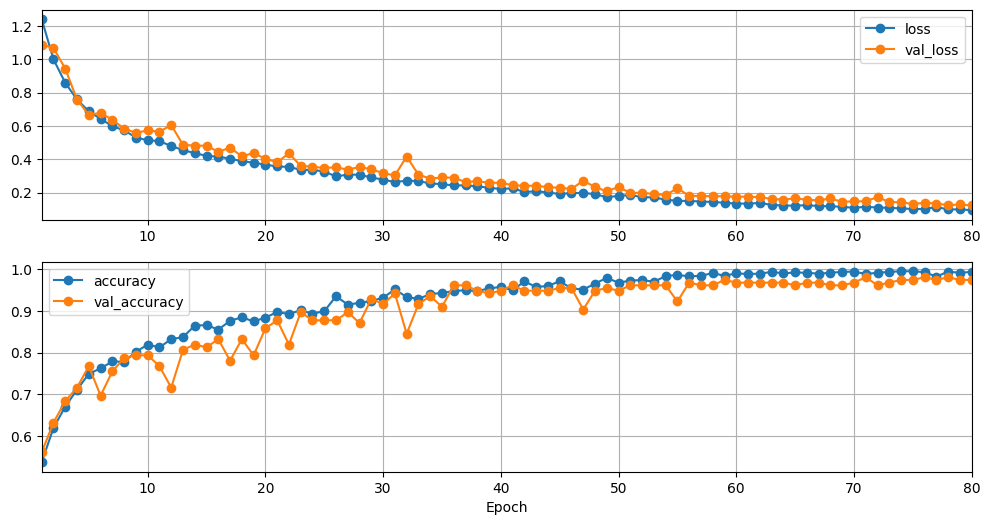

In [ ]:
plot_history(history, width=12, height=6)

In [ ]:
print('(Loss) Best epochs: {}'.format(argmin(history.history['val_loss'])+1))
print('(Accuracy) Best epochs: {}'.format(argmax(history.history['val_accuracy'])+1))

(Loss) Best epochs: 80
(Accuracy) Best epochs: 71


## Best model

In [ ]:
## Model instance
model = Sequential(name='Classifer')
model.add(layers.Input(shape=(X_train.shape[1],), name='Input'))
"""
model.add(layers.Dense(units=8,
                       activation='relu',
                       name='Dense_01'))
"""
model.add(layers.Dense(units=y_train.shape[1],
                       activation='softmax',
                       name='output'))

## Compiler settings
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
start = time()

## Model fitting
history = model.fit(x=X_train, y=y_train,
                    batch_size=32,
                    epochs=71)

timeUp = time()
print('Time spent[s]: {}'.format(timeUp -start))

Epoch 1/71
49/49 [==============================] - 1s 3ms/step - loss: 1.1866 - accuracy: 0.5664
Epoch 2/71
49/49 [==============================] - 0s 3ms/step - loss: 0.9359 - accuracy: 0.6533
Epoch 3/71
49/49 [==============================] - 0s 3ms/step - loss: 0.7955 - accuracy: 0.7103
Epoch 4/71
49/49 [==============================] - 0s 3ms/step - loss: 0.7015 - accuracy: 0.7421
Epoch 5/71
49/49 [==============================] - 0s 6ms/step - loss: 0.6616 - accuracy: 0.7667
Epoch 6/71
49/49 [==============================] - 0s 6ms/step - loss: 0.5986 - accuracy: 0.7732
Epoch 7/71
49/49 [==============================] - 0s 6ms/step - loss: 0.5554 - accuracy: 0.7900
Epoch 8/71
49/49 [==============================] - 0s 6ms/step - loss: 0.5777 - accuracy: 0.7699
Epoch 9/71
49/49 [==============================] - 0s 6ms/step - loss: 0.5141 - accuracy: 0.8127
Epoch 10/71
49/49 [==============================] - 0s 6ms/step - loss: 0.4918 - accuracy: 0.8146
Epoch 11/71
49/49 [

21/21 [==============================] - 0s 4ms/step - loss: 0.1157 - accuracy: 0.9894
[0.11574278771877289, 0.9894259572029114]


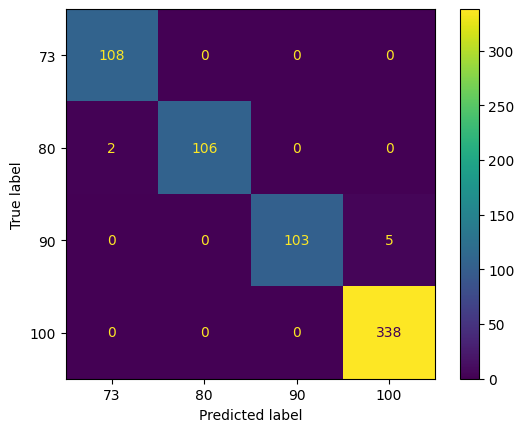

In [ ]:
## Compute prediction
prediction = model.predict(X_test)

## Decoding prediction to labels
predict_decod = argmax(prediction, axis=1)
y_test_decod = argmax(y_test.values, axis=1)

## Print scores w.r.t test set
print(model.evaluate(X_test, y_test))

## Compute confusion matrix
cm = confusion_matrix(y_true=y_test_decod,
                      y_pred=predict_decod)
CM = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=y_test.columns)
CM.plot()
plt.show()
